In [1]:
import pandas as pd

In [2]:
clustered = pd.read_csv('data/cluster-centers_chr22.csv.gz', index_col=0)

In [3]:
ped = pd.read_csv('data/integrated_call_samples_v2.20130502.ALL.ped.bz2', sep='\t', index_col=1)
ped

,Family ID,Paternal ID,Maternal ID,Gender,Phenotype,Population,Relationship,Siblings,Second Order,Third Order,Children,Other Comments,phase 3 genotypes,related genotypes,omni genotypes,affy_genotypes
Individual ID,,,,,,,,,,,,,,,,
HG00096,HG00096,0,0,1,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00097,HG00097,0,0,2,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00098,HG00098,0,0,1,0,GBR,unrel,0,0,0,0,0,0,0,1,1
HG00099,HG00099,0,0,2,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00100,HG00100,0,0,2,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00101,HG00101,0,0,1,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00102,HG00102,0,0,2,0,GBR,unrel,0,0,0,0,0,1,0,1,1
HG00103,HG00103,0,0,1,0,GBR,unrel,0,0,0,0,0,1,0,1,0
HG00104,HG00104,0,0,2,0,GBR,unrel,0,0,0,0,0,0,0,1,1


In [4]:
joined = clustered.join(ped)

In [5]:
pops = joined.groupby('Population').mean()[clustered.columns]
pops

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Population,,,,,,,,,,,,,,,,,,,,,
ACB,1.805210,0.309657,0.182349,0.826776,0.085103,0.001229,0.197861,0.268136,0.051357,0.279095,...,0.837020,0.242519,0.025348,0.064686,0.335316,0.869974,0.111718,0.264843,0.026167,0.792401
ASW,1.802774,0.265552,0.179231,0.853655,0.061577,0.001267,0.163868,0.249134,0.084214,0.253924,...,0.718213,0.261761,0.022371,0.055294,0.358103,0.958887,0.080712,0.265509,0.042977,0.755019
BEB,1.808528,0.022379,0.254112,0.865306,0.164132,0.001651,0.013760,0.174223,0.329187,0.009035,...,0.168440,0.538803,0.000855,0.001563,0.663740,1.400608,0.006837,0.078251,0.392512,0.579878
CDX,1.861620,0.009651,0.043181,0.565582,0.091945,0.001415,0.007182,0.197197,0.204056,0.006958,...,0.107675,0.333223,0.000572,0.001036,1.118232,1.473165,0.002011,0.091906,0.365261,0.634334
CEU,1.767047,0.026189,0.203946,1.042776,0.095247,0.001111,0.011175,0.128561,0.146112,0.009810,...,0.151537,0.293693,0.000626,0.001226,0.458680,1.364414,0.007097,0.163697,0.086766,0.520791
CHB,1.862615,0.009183,0.035132,0.586726,0.119461,0.001393,0.006980,0.189602,0.138632,0.008521,...,0.106324,0.328785,0.000514,0.000918,1.111710,1.482280,0.002645,0.070878,0.278846,0.640358
CHS,1.862002,0.009321,0.024965,0.579526,0.117254,0.001292,0.006577,0.196786,0.136951,0.010458,...,0.105854,0.317108,0.000495,0.001156,1.129214,1.480331,0.002406,0.084843,0.288700,0.639277
CLM,1.786632,0.048230,0.155848,0.988441,0.106178,0.001137,0.028161,0.148712,0.044203,0.022692,...,0.205958,0.270513,0.003001,0.006376,0.533838,1.353629,0.013655,0.315907,0.115053,0.551487
ESN,1.809386,0.365129,0.248068,0.780818,0.072196,0.001029,0.223937,0.295442,0.078381,0.327883,...,0.938622,0.235010,0.028917,0.073576,0.305028,0.790633,0.106277,0.261152,0.019119,0.846860


In [6]:
from scipy.spatial.distance import pdist
dist_vectror = pdist(pops)

In [7]:
import scipy.cluster
cl = scipy.cluster.hierarchy.linkage(dist_vectror, method='average')

In [8]:
pop_desc = pd.read_csv('data/1000_gen_populations.txt', sep='\t', index_col=0)
pop_desc

,Population Description,Super Population Code,Sequence Data Available,Alignment Data Available,Variant Data Available
Population Code,,,,,
CHB,"Han Chinese in Bejing, China",EAS,1,1,1
JPT,"Japanese in Tokyo, Japan",EAS,1,1,1
CHS,Southern Han Chinese,EAS,1,1,1
CDX,"Chinese Dai in Xishuangbanna, China",EAS,1,1,1
KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS,1,1,1
CEU,Utah Residents (CEPH) with Northern and Wester...,EUR,1,1,1
TSI,Toscani in Italia,EUR,1,1,1
FIN,Finnish in Finland,EUR,1,1,1
GBR,British in England and Scotland,EUR,1,1,1


In [9]:


labels = pop_desc.loc[pops.index][['Population Description', 'Super Population Code']].apply(" ".join, axis=1)
labels

Population
ACB                   African Caribbeans in Barbados AFR
ASW          Americans of African Ancestry in SW USA AFR
BEB                          Bengali from Bangladesh SAS
CDX              Chinese Dai in Xishuangbanna, China EAS
CEU    Utah Residents (CEPH) with Northern and Wester...
CHB                     Han Chinese in Bejing, China EAS
CHS                             Southern Han Chinese EAS
CLM               Colombians from Medellin, Colombia AMR
ESN                                  Esan in Nigeria AFR
FIN                               Finnish in Finland EUR
GBR                  British in England and Scotland EUR
GIH              Gujarati Indian from Houston, Texas SAS
GWD       Gambian in Western Divisions in the Gambia AFR
IBS                      Iberian Population in Spain EUR
ITU                        Indian Telugu from the UK SAS
JPT                         Japanese in Tokyo, Japan EAS
KHV                Kinh in Ho Chi Minh City, Vietnam EAS
LWK                 

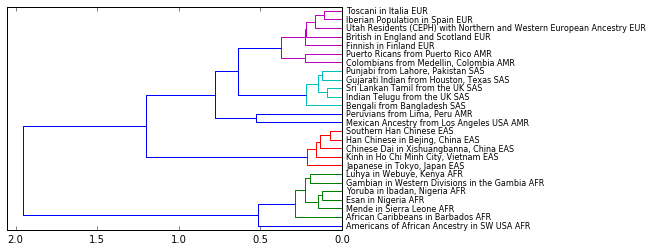

In [10]:
import matplotlib.pyplot as plt
scipy.cluster.hierarchy.dendrogram(cl, orientation = 'left', 
                                   color_threshold = 0.4, labels = labels, leaf_font_size = 8)
plt.show()